In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm




In [44]:

data = {
    'VehicleType': ['Gasoline Vehicles', 'Hybrid Cars', 'All-Electric Vehicles'],
    'Minimum': [240.0, 150.0, 62.0],
    'Median': [412.0, 440.0, 83.5],
    'Maximum': [703.0, 600.0, 294.0]
}

df = pd.DataFrame(data)



In [45]:
df.dropna(inplace=True)  


scaler = StandardScaler()


scaled_features = scaler.fit_transform(df[['Minimum', 'Median', 'Maximum']])




In [46]:
df_scaled = pd.DataFrame(scaled_features, columns=['Minimum', 'Median', 'Maximum'])


df_scaled['VehicleType'] = df['VehicleType']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


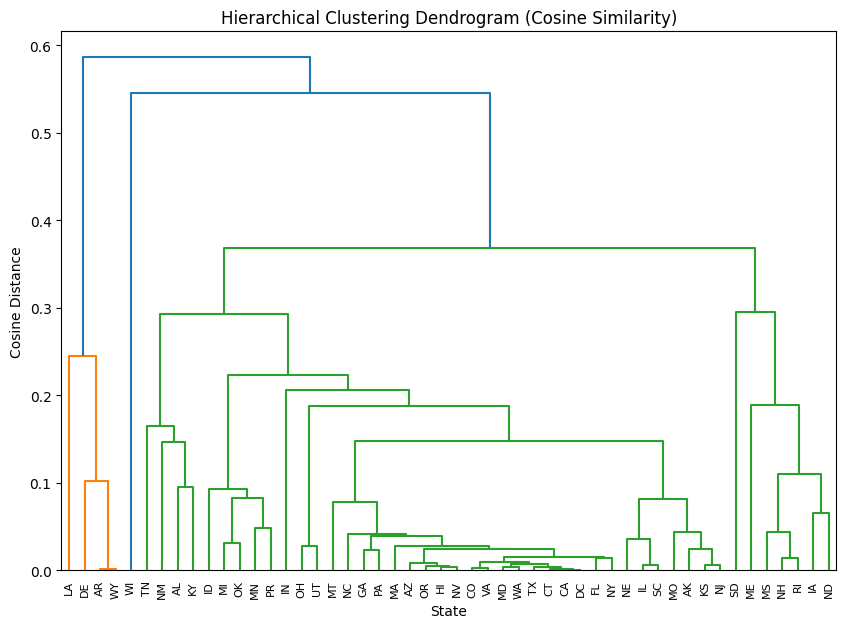

K-means cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0]
Linkage matrix: [[4.00000000e+00 7.00000000e+00 5.98703827e-04 2.00000000e+00]
 [2.00000000e+00 4.90000000e+01 1.22928570e-03 2.00000000e+00]
 [6.00000000e+00 5.00000000e+01 1.74000558e-03 3.00000000e+00]
 [5.00000000e+00 4.60000000e+01 2.79488447e-03 2.00000000e+00]
 [2.00000000e+01 4.70000000e+01 3.46297764e-03 2.00000000e+00]
 [1.10000000e+01 3.30000000e+01 3.72238532e-03 2.00000000e+00]
 [4.40000000e+01 5.20000000e+01 4.05097582e-03 4.00000000e+00]
 [3.70000000e+01 5.50000000e+01 5.18517328e-03 3.00000000e+00]
 [1.60000000e+01 3.10000000e+01 5.72883380e-03 2.00000000e+00]
 [1.40000000e+01 4.10000000e+01 6.15580891e-03 2.00000000e+00]
 [5.40000000e+01 5.60000000e+01 7.74135650e-03 6.00000000e+00]
 [3.00000000e+00 5.70000000e+01 8.60605554e-03 4.00000000e+00]
 [5.30000000e+01 6.00000000e+01 9.06507878e-03 8.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.3545

In [47]:


df = pd.read_csv("/Users/aryamansingh/Desktop/CUB course/Machine learning /project/dataset/state_year_totals_electrci.csv")


df_pivot = df.pivot(index='State', columns='Year', values='Total Vehicles').fillna(0).astype(int)

kmeans = KMeans(n_clusters=2)  
kmeans.fit(df_pivot)
labels_kmeans = kmeans.labels_


X_hclust = df_pivot.values
Z = linkage(X_hclust, method='average', metric='cosine')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_pivot.index)
plt.title("Hierarchical Clustering Dendrogram (Cosine Similarity)")
plt.xlabel("State")
plt.ylabel("Cosine Distance")
plt.show()

print("K-means cluster labels:", labels_kmeans)
print("Linkage matrix:", Z)


In [48]:


X = fuel_count['Count'].values.reshape(-1, 1)  


kmeans = KMeans(n_clusters=2)  
kmeans.fit(X)


labels = kmeans.labels_


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/j6/fll5x1pn6cx824z6k5cxcmqm0000gn/T/ipykernel_12426/1201683612.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(total_vehicles[i], y_jitter[i], state)


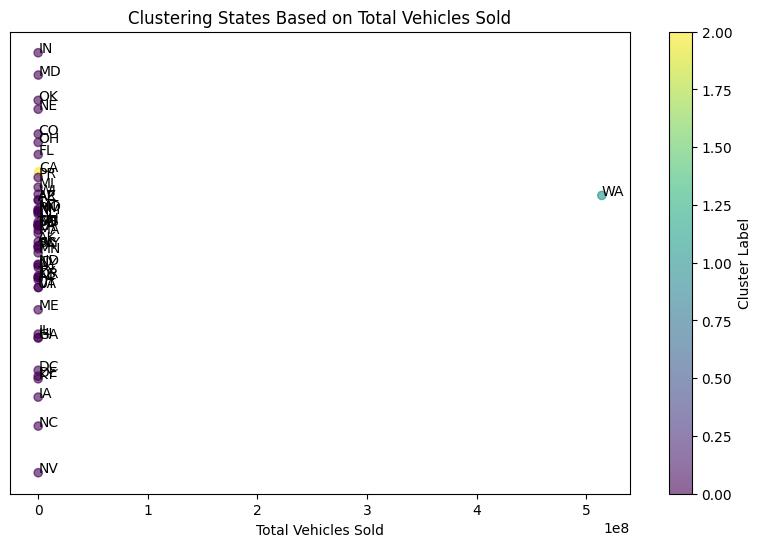

In [49]:



total_vehicles = df_pivot.sum(axis=1)

X = total_vehicles.values.reshape(-1, 1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))


y_jitter = np.random.normal(0, 0.1, size=total_vehicles.shape[0])

plt.scatter(total_vehicles, y_jitter, c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Total Vehicles Sold')
plt.yticks([])  
plt.title('Clustering States Based on Total Vehicles Sold')
plt.colorbar(label='Cluster Label')


for i, state in enumerate(total_vehicles.index):
    plt.text(total_vehicles[i], y_jitter[i], state)

plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


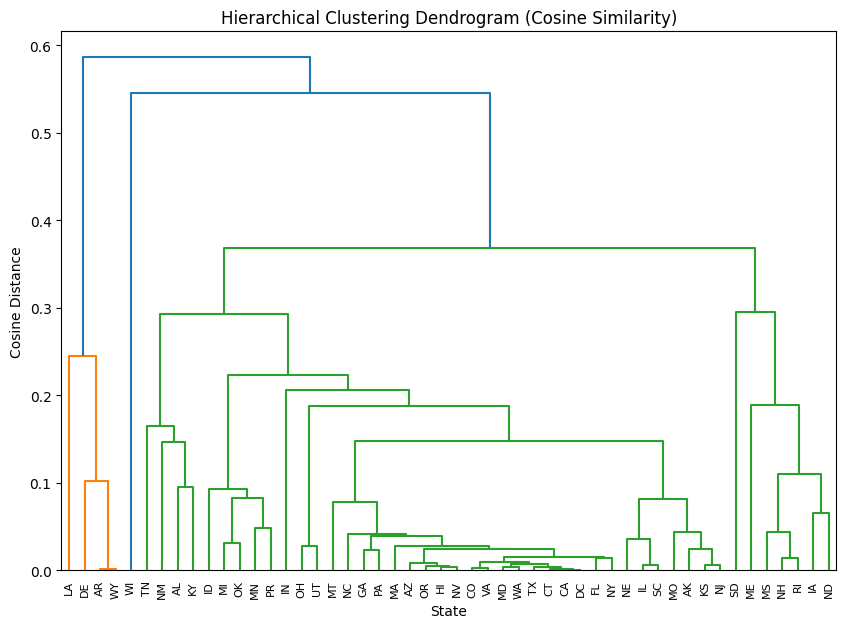

K-means cluster labels: [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0]
Linkage matrix: [[4.00000000e+00 7.00000000e+00 5.98703827e-04 2.00000000e+00]
 [2.00000000e+00 4.90000000e+01 1.22928570e-03 2.00000000e+00]
 [6.00000000e+00 5.00000000e+01 1.74000558e-03 3.00000000e+00]
 [5.00000000e+00 4.60000000e+01 2.79488447e-03 2.00000000e+00]
 [2.00000000e+01 4.70000000e+01 3.46297764e-03 2.00000000e+00]
 [1.10000000e+01 3.30000000e+01 3.72238532e-03 2.00000000e+00]
 [4.40000000e+01 5.20000000e+01 4.05097582e-03 4.00000000e+00]
 [3.70000000e+01 5.50000000e+01 5.18517328e-03 3.00000000e+00]
 [1.60000000e+01 3.10000000e+01 5.72883380e-03 2.00000000e+00]
 [1.40000000e+01 4.10000000e+01 6.15580891e-03 2.00000000e+00]
 [5.40000000e+01 5.60000000e+01 7.74135650e-03 6.00000000e+00]
 [3.00000000e+00 5.70000000e+01 8.60605554e-03 4.00000000e+00]
 [5.30000000e+01 6.00000000e+01 9.06507878e-03 8.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.3545

In [61]:




df = pd.read_csv("/Users/aryamansingh/Desktop/CUB course/Machine learning /project/dataset/state_year_totals_electrci.csv")

df_pivot = df.pivot(index='State', columns='Year', values='Total Vehicles').fillna(0).astype(int)


kmeans = KMeans(n_clusters=3) 
kmeans.fit(df_pivot)
labels_kmeans = kmeans.labels_

X_hclust = df_pivot.values
Z = linkage(X_hclust, method='average', metric='cosine')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_pivot.index)
plt.title("Hierarchical Clustering Dendrogram (Cosine Similarity)")
plt.xlabel("State")
plt.ylabel("Cosine Distance")
plt.show()

print("K-means cluster labels:", labels_kmeans)
print("Linkage matrix:", Z)


In [ ]:



silhouette_vals = silhouette_samples(data_scaled, clusters)
silhouette_avg = silhouette_score(data_scaled, clusters)


fig, ax = plt.subplots(figsize=(10, 8))
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(clusters)):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.jet(float(i) / len(np.unique(clusters)))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10 

ax.set_title('Silhouette Plot')
ax.set_xlabel('Silhouette Coefficient Values')
ax.set_ylabel('Cluster Label')

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [ ]:



silhouette_vals = silhouette_samples(df_pivot[['Total Vehicles']], df_pivot['Cluster'])

silhouette_avg = silhouette_score(df_pivot[['Total Vehicles']], df_pivot['Cluster'])

print(f'Average silhouette score: {silhouette_avg}')


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
r
y_lower = 10
for i in range(3):  
    ith_cluster_silhouette_values = silhouette_vals[df_pivot['Cluster'] == i]
    
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  

ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

